<div style="border-radius: 20px; border: 2px solid #64B5F6; padding: 15px; background-color: #87CEEB; text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.4), 0px 6px 20px rgba(0, 0, 0, 0.19); transform: perspective(1000px) rotateX(5deg) rotateY(-5deg); transition: transform 0.5s ease-in-out;">
    <h1 style="color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.4); font-weight: bold; margin-bottom: 10px; font-size: 32px;">
        Welcome!
    </h1>
    <p style="color: black; font-size: 18px; margin: 10px 0;">
        Hi there! I'm Maryam Fatima, a dedicated Data Analyst in training. I'm deeply immersed in the world of AI, exploring various concepts and techniques to enhance my skills. Join me on this exciting journey as we learn and grow together in the field of AI.
    </p>
    <p style="color: black; font-size: 16px; font-style: italic; margin: 10px 0;">
        "Community empowers growth through shared knowledge and mutual support."
    </p>
    <h2 style="color: black; margin-top: 15px; font-size: 28px;">Contact Information</h2>
    <table style="width: 100%; margin-top: 15px; border-collapse: collapse;">
        <tr>
            <th style="color: black; font-size: 18px; padding: 8px; border-bottom: 2px solid #64B5F6;">Name</th>
            <th style="color: black; font-size: 18px; padding: 8px; border-bottom: 2px solid #64B5F6;">Email</th>
            <th style="color: black; font-size: 18px; padding: 8px; border-bottom: 2px solid #64B5F6;">LinkedIn</th>
            <th style="color: black; font-size: 18px; padding: 8px; border-bottom: 2px solid #64B5F6;">GitHub</th>
            <th style="color: black; font-size: 18px; padding: 8px; border-bottom: 2px solid #64B5F6;">Kaggle</th>
        </tr>
        <tr>
            <td style="font-size: 16px; padding: 8px; color: black;">Maryam Fatima</td>
            <td style="font-size: 16px; padding: 8px; color: black;">mustafashoukat.ai@gmail.com</td>
            <td style="font-size: 16px; padding: 8px;">
                <a href="https://www.linkedin.com/in/mustafashoukat/" target="_blank">
                    <img src="https://img.shields.io/badge/LinkedIn-0e76a8.svg?style=for-the-badge&logo=LinkedIn&logoColor=white" alt="LinkedIn Badge" style="border-radius: 5px;">
                </a>
            </td>
            <td style="font-size: 16px; padding: 8px;">
                <a href="https://github.com/Mustafa-Shoukat1" target="_blank">
                    <img src="https://img.shields.io/badge/GitHub-171515.svg?style=for-the-badge&logo=GitHub&logoColor=white" alt="GitHub Badge" style="border-radius: 5px;">
                </a>
            </td>
            <td style="font-size: 16px; padding: 8px;">
                <a href="https://www.kaggle.com/mustafashoukat" target="_blank">
                    <img src="https://img.shields.io/badge/Kaggle-20beff.svg?style=for-the-badge&logo=Kaggle&logoColor=white" alt="Kaggle Badge" style="border-radius: 5px; margin: 0 5px;">
                </a>
            </td>
        </tr>
    </table>
</div>


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/machine-learning/lending_club_loan_dataset.csv


## Import the Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

## Load the dataset

In [3]:
df = pd.read_csv("/kaggle/input/machine-learning/lending_club_loan_dataset.csv")
df.sample(5)

,id,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
11823,9216235,B,27500.0,0,8,NaN,10.04,debt_consolidation,36 months,0,1.0,73.7,0.0,0.274483,0
10200,8147706,B,107000.0,0,10,NaN,5.52,debt_consolidation,36 months,0,NaN,30.2,0.0,0.658406,0
9373,8637014,B,54000.0,0,11,RENT,21.23,debt_consolidation,36 months,1,NaN,14.0,0.0,0.598108,0
17828,6318415,E,76003.0,0,9,MORTGAGE,20.21,debt_consolidation,36 months,1,NaN,59.9,0.0,0.864701,0
17323,6208787,F,72000.0,1,1,MORTGAGE,15.85,debt_consolidation,60 months,1,NaN,66.7,0.0,0.025082,0


## proformed EDA

In [4]:
df.shape

(20000, 15)

In [5]:
# List of important columns and the target column
important_columns = [
    "grade",
    "annual_inc",
    "emp_length_num",
    "home_ownership",
    "dti",
    "purpose",
    "last_delinq_none",
    "revol_util",
    "bad_loan"  # Target column
]

# Filter the dataset to keep only the important columns
df_filter = df[important_columns]

# Display the filtered dataset
df_filter.head(3)


,grade,annual_inc,emp_length_num,home_ownership,dti,purpose,last_delinq_none,revol_util,bad_loan
0,A,100000.0,1,RENT,26.27,credit_card,1,43.2,0
1,A,83000.0,4,OWN,5.39,credit_card,0,21.5,0
2,D,78000.0,11,MORTGAGE,18.45,debt_consolidation,1,46.3,1


In [6]:
df_filter.shape

(20000, 9)

In [7]:
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   grade             20000 non-null  object 
 1   annual_inc        20000 non-null  float64
 2   emp_length_num    20000 non-null  int64  
 3   home_ownership    18509 non-null  object 
 4   dti               19846 non-null  float64
 5   purpose           20000 non-null  object 
 6   last_delinq_none  20000 non-null  int64  
 7   revol_util        20000 non-null  float64
 8   bad_loan          20000 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 1.4+ MB


In [8]:
df_filter.isnull().mean()* 100

grade               0.000
annual_inc          0.000
emp_length_num      0.000
home_ownership      7.455
dti                 0.770
purpose             0.000
last_delinq_none    0.000
revol_util          0.000
bad_loan            0.000
dtype: float64

## Remove the missing Values

In [9]:
df_filter['dti'].fillna(df_filter['dti'].median(), inplace=True)

<ipython-input-9-a387acc7d0ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['dti'].fillna(df_filter['dti'].median(), inplace=True)


In [10]:
df_filter['home_ownership'].fillna(df_filter['home_ownership'].mode()[0], inplace=True)


# Display the updated DataFrame
df_filter.isnull().sum()

<ipython-input-10-8c3472073333>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['home_ownership'].fillna(df_filter['home_ownership'].mode()[0], inplace=True)


grade               0
annual_inc          0
emp_length_num      0
home_ownership      0
dti                 0
purpose             0
last_delinq_none    0
revol_util          0
bad_loan            0
dtype: int64

## Scaling 

In [11]:
# Selecting numerical columns
numerical_columns = ["annual_inc", "emp_length_num", "dti", "revol_util"]

# Applying StandardScaler
scaler = StandardScaler()
df_filter[numerical_columns] = scaler.fit_transform(df_filter[numerical_columns])

# Display the updated DataFrame
print(df_filter)

      grade  annual_inc  emp_length_num home_ownership       dti  \
0         A    0.589645       -1.542446           RENT  1.281718   
1         A    0.213517       -0.747562            OWN -1.481488   
2         D    0.102891        1.107167       MORTGAGE  0.246839   
3         D   -0.792381       -0.217639       MORTGAGE -0.569683   
4         D   -0.184736        1.107167       MORTGAGE -0.704668   
...     ...         ...             ...            ...       ...   
19995     B   -1.025491        0.577245           RENT  0.234928   
19996     B   -0.627239       -1.277484       MORTGAGE  0.878088   
19997     B    0.678145       -0.482601       MORTGAGE -0.438669   
19998     A   -0.773265       -1.277484       MORTGAGE -0.495574   
19999     B    1.695902        1.107167       MORTGAGE -1.903645   

                  purpose  last_delinq_none  revol_util  bad_loan  
0             credit_card                 1   -0.302926         0  
1             credit_card                 0   -

<ipython-input-11-05c38d7678f8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter[numerical_columns] = scaler.fit_transform(df_filter[numerical_columns])


## Encoding categorical variable using column transformer

In [12]:
# Define the column transformer
column_transformer = ColumnTransformer(
    transformers=[
        # Ordinal Encoding for 'grade'
        ('grade_ordinal', OrdinalEncoder(categories=[['A', 'B', 'C', 'D', 'E', 'F', 'G']]), ['grade']),
        # One-Hot Encoding for 'home_ownership' and 'purpose'
        ('home_ownership_onehot', OneHotEncoder(drop='first'), ['home_ownership']),
        ('purpose_onehot', OneHotEncoder(drop='first'), ['purpose']),
        # Do not apply transformation to 'term', keep it as is
    ],
    remainder='passthrough'  # Keep other columns as they are
)

# Create a pipeline with the column transformer
pipeline = Pipeline(steps=[('column_transformer', column_transformer)])

# Apply the transformations
df_filter = pipeline.fit_transform(df_filter)

# Get feature names from OneHotEncoders
home_ownership_features = pipeline.named_steps['column_transformer'].transformers_[1][1].get_feature_names_out(['home_ownership'])
purpose_features = pipeline.named_steps['column_transformer'].transformers_[2][1].get_feature_names_out(['purpose'])

# Combine all feature names and include 'term' as is
all_columns = ['grade'] + list(home_ownership_features) + list(purpose_features) + [ 'annual_inc', 'emp_length_num', 'dti', 'last_delinq_none', 'revol_util', 'bad_loan']

# Convert the transformed result back to a DataFrame
df_filter = pd.DataFrame(df_filter, columns=all_columns)

# Display the transformed DataFrame
df_filter.head()

,grade,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding,annual_inc,emp_length_num,dti,last_delinq_none,revol_util,bad_loan
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.589645,-1.542446,1.281718,1.0,-0.302926,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.213517,-0.747562,-1.481488,0.0,-0.818165,0.0
2,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.102891,1.107167,0.246839,1.0,-0.229320,1.0
3,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.792381,-0.217639,-0.569683,0.0,-1.074597,1.0
4,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.184736,1.107167,-0.704668,0.0,-0.967750,0.0


## Transformation for numerical columns

In [13]:
# # Define the transformer for numerical columns
# column_transformer = ColumnTransformer(
#     transformers=[
#         ('log_transform', FunctionTransformer(np.log1p, validate=True), ['annual_inc', 'dti', 'revol_util']),
#     ],
#     remainder='passthrough'  # Keep other columns (encoded or not) unchanged
# )

# # Create a pipeline with the column transformer
# pipeline = Pipeline(steps=[('column_transformer', column_transformer)])

# # Apply the transformations
# df_transformed = pipeline.fit_transform(df_filter)

# # Convert the transformed result back to a DataFrame
# df_filter = pd.DataFrame(df_transformed, columns=df_filter.columns)

# # Display the transformed DataFrame
# df_filter.head()

In [14]:
df_filter.sample(10)

,grade,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding,annual_inc,emp_length_num,dti,last_delinq_none,revol_util,bad_loan
5743,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.914866,-0.747562,2.092946,1.0,-0.343290,0.0
5452,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.317487,1.107167,-0.668936,0.0,0.190943,0.0
2730,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.604516,1.107167,0.310361,0.0,0.383268,0.0
14617,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.173673,1.107167,0.425494,1.0,-0.896519,0.0
6447,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.461545,-0.747562,-0.520719,1.0,0.190943,0.0
997,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.368393,1.107167,-0.199138,1.0,-0.196079,0.0
5044,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.295361,-1.807407,1.108356,1.0,-0.184207,1.0
18421,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.804240,-0.217639,2.096916,1.0,-0.276808,0.0
1000,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.104974,1.107167,1.732988,0.0,0.409386,0.0
4311,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.240049,0.312283,0.731194,1.0,0.053230,1.0


## Models Train

In [15]:

# # Separate features and target
# X = df_transformed.drop(columns=['bad_loan'])  # Features (exclude the target column)
# y = df_transformed['bad_loan']  # Target

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize the Gradient Boosting Classifier
# gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# # Train the model
# gbc.fit(X_train, y_train)

# # Make predictions
# y_pred = gbc.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

In [16]:
# from sklearn.ensemble import RandomForestClassifier
# # Separate features and target
# X = df_transformed.drop(columns=['bad_loan'])  # Features (exclude the target column)
# y = df_transformed['bad_loan']  # Target

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize the Random Forest Classifier
# rf = RandomForestClassifier(n_estimators=100, random_state=42)

# # Train the model
# rf.fit(X_train, y_train)

# # Make predictions
# y_pred = rf.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)


## Accuracy: 0.80% LogisticRegression 

In [17]:
# Separate features and target
X = df_filter.drop(columns=['bad_loan'])  # Features (exclude the target column)
y = df_filter['bad_loan']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.80075


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(log_reg, X, y, cv=5)  # 5-fold cross-validation
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-validation scores: [0.79925 0.801   0.79975 0.8     0.80225]
Mean cross-validation score: 0.80045


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Accuracy: 0.79% RandomForestClassifier

## Accuracy: 0.80% Algorithm GradientBoostingClassifier


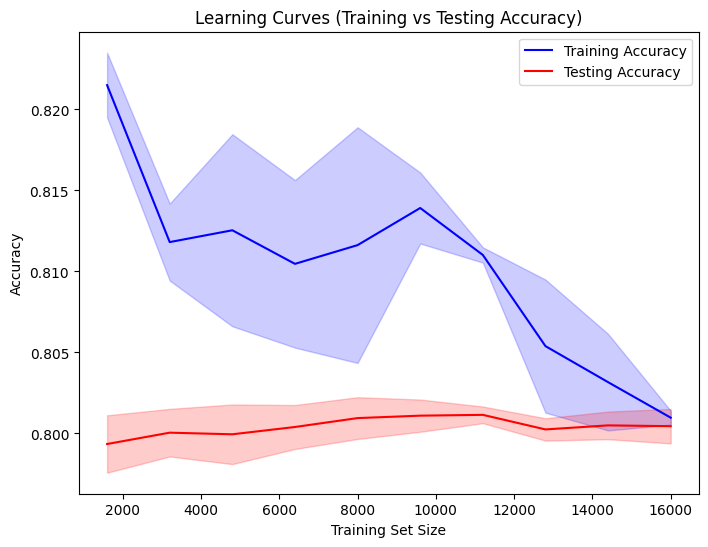

In [19]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(log_reg, X, y, cv=5, n_jobs=-1, train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

# Calculate mean and standard deviation of scores
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_std = test_scores.std(axis=1)

# Plot the learning curves
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue')
plt.plot(train_sizes, test_mean, label='Testing Accuracy', color='red')

# Plot the fill between the curves for standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.2)

# Adding labels and title
plt.title("Learning Curves (Training vs Testing Accuracy)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()

# Show the plot
plt.show()


In [20]:
log_reg = LogisticRegression(penalty='l2', C=1, random_state=42)


In [21]:
# Train the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy after applying regularization:", accuracy)


Accuracy after applying regularization: 0.80075


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
